In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [3]:
train, test = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

train_x, train_y = tfds.as_numpy(train)
test_x, train_y = tfds.as_numpy(test)

Shuffling and writing examples to C:\Users\Weronika\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteQIK3FN\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\Weronika\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteQIK3FN\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\Weronika\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteQIK3FN\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\Weronika\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [4]:
train_x[:10]

array([b'This is a big step down after the surprisingly enjoyable original. This sequel isn\'t nearly as fun as part one, and it instead spends too much time on plot development. Tim Thomerson is still the best thing about this series, but his wisecracking is toned down in this entry. The performances are all adequate, but this time the script lets us down. The action is merely routine and the plot is only mildly interesting, so I need lots of silly laughs in order to stay entertained during a "Trancers" movie. Unfortunately, the laughs are few and far between, and so, this film is watchable at best.',
       b"Perhaps because I was so young, innocent and BRAINWASHED when I saw it, this movie was the cause of many sleepless nights for me. I haven't seen it since I was in seventh grade at a Presbyterian school, so I am not sure what effect it would have on me now. However, I will say that it left an impression on me... and most of my friends. It did serve its purpose, at least until we 

In [5]:
train_y[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [7]:
import tensorflow_hub as hub

model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_x[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 2.209591  , -2.7093675 ,  3.6802928 , -1.0291991 , -4.1671185 ,
        -2.4566064 , -2.2519937 , -0.36589956,  1.9485804 , -3.1104462 ,
        -2.4610963 ,  1.3139242 , -0.9161584 , -0.16625322, -3.723651  ,
         1.8498232 ,  3.499562  , -1.2373022 , -2.8403084 , -1.213074  ],
       [ 1.9055302 , -4.11395   ,  3.6038654 ,  0.28555924, -4.658998  ,
        -5.5433393 , -3.2735848 ,  1.9235417 ,  3.8461034 ,  1.5882455 ,
        -2.64167   ,  0.76057523, -0.14820506,  0.9115291 , -6.45758   ,
         2.3990374 ,  5.0985413 , -3.2776263 , -3.2652326 , -1.2345369 ],
       [ 3.6510668 , -4.7066135 ,  4.71003   , -1.7002777 , -3.7708545 ,
        -3.709126  , -4.222776  ,  1.946586  ,  6.1182513 , -2.7392752 ,
        -5.4384456 ,  2.7078724 , -2.1263676 , -0.7084146 , -5.893995  ,
         3.1602864 ,  3.8389287 , -3.318196  , -5.1542974 , -2.4051712 ]],
      dtype=float32)>

In [8]:
import tensorflow.keras.layers as ly

model = tf.keras.Sequential([
    hub_layer,
    ly.Dense(16, activation="relu"),
    ly.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer="adam", loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

In [10]:
x_val = train_x[:10000]
p_x_train = train_x[10000:]

y_val = train_y[:10000]
p_y_train = train_y[10000:]

In [11]:
history = model.fit(p_x_train, p_y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/40
30/30 [==============================] - 4s 124ms/step - loss: 1.8806 - accuracy: 0.4950 - val_loss: 0.8985 - val_accuracy: 0.5117
Epoch 2/40
30/30 [==============================] - 3s 102ms/step - loss: 0.7912 - accuracy: 0.5025 - val_loss: 0.7495 - val_accuracy: 0.4982
Epoch 3/40
30/30 [==============================] - 3s 96ms/step - loss: 0.7391 - accuracy: 0.5039 - val_loss: 0.7288 - val_accuracy: 0.5000
Epoch 4/40
30/30 [==============================] - 3s 103ms/step - loss: 0.7253 - accuracy: 0.5059 - val_loss: 0.7206 - val_accuracy: 0.4984
Epoch 5/40
30/30 [==============================] - 3s 101ms/step - loss: 0.7134 - accuracy: 0.5125 - val_loss: 0.7156 - val_accuracy: 0.4969
Epoch 6/40
30/30 [==============================] - 3s 95ms/step - loss: 0.7058 - accuracy: 0.5153 - val_loss: 0.7097 - val_accuracy: 0.4967
Epoch 7/40
30/30 [==============================] - 3s 94ms/step - loss: 0.6981 - accuracy: 0.5175 - val_loss: 0.7061 - val_accuracy: 0.4953
Epoch 8/4

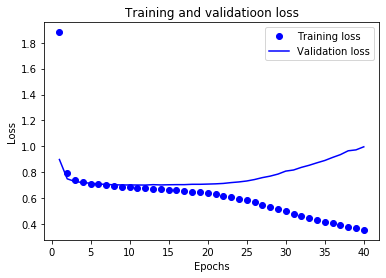

In [16]:
ep = range(1, len(history.history["loss"])+1)
plt.plot(ep, history.history["loss"], 'bo', label="Training loss")
plt.plot(ep, history.history["val_loss"], 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

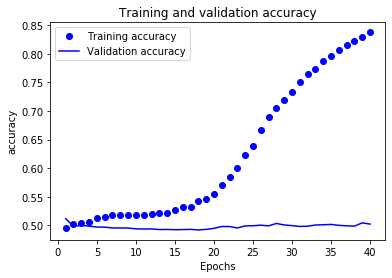

In [17]:
ep = range(1, len(history.history["accuracy"])+1)
plt.plot(ep, history.history["accuracy"], 'bo', label="Training accuracy")
plt.plot(ep, history.history["val_accuracy"], 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()